# 01_eda_regimes.ipynb
# ---
# AI-Driven Volatility Forecasting & Adaptive Portfolio Optimization
# Notebook 01: Exploratory Data Analysis — Volatility Regimes
# ---
# ## Purpose
# This notebook explores volatility regimes using VIX data, regime detection logic
# from `src/features/regimes.py`, and regime-conditioned return distributions.
#
# Audience Fit:
# - **Quant recruiters** → See rigorous methodology, clean plots, reproducibility
# - **Portfolio managers** → Understand regime behavior, tail risks, transition dynamics
# - **Executives** → Clear story of how volatility regimes matter for allocation
#
# ## Notebook Sections
# 1. Setup & Imports
# 2. Load Market Data (SPY + VIX as baseline)
# 3. Apply Regime Detector (from regimes.py)
# 4. Visualize Regimes on Price & Volatility
# 5. Regime Statistics (mean returns, vol, drawdowns)
# 6. Transition Analysis
# 7. Save Outputs (figures + regime features parquet)

# -------------------
# 1. Setup & Imports
# -------------------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from src.features.regimes import RegimeDetector, VolatilityRegime
from src.data.fetchers import get_yfinance_data
from src.config import settings

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Output paths
OUTPUT_DIR = Path("reports/eda")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

ModuleNotFoundError: No module named 'src'

# --------------------------
# 2. Load Market Data (SPY)
# --------------------------

In [4]:
# Example: SPY (equity) + VIX (volatility proxy)
tickers = ["SPY", "^VIX"]
df = get_yfinance_data(tickers, start="2015-01-01", end="2025-01-01")

# Ensure clean format
df = df.rename(columns={"Adj Close": "price"}) if "Adj Close" in df.columns else df
df = df.dropna()

# Daily returns
df["returns"] = df["SPY"].pct_change()

NameError: name 'get_yfinance_data' is not defined

# ---------------------------
# 3. Apply Regime Detection
# ---------------------------

In [5]:
detector = RegimeDetector()
regimes = detector.detect_regimes(df["VIX"])
df["regime"] = regimes.values

# Add one-hot regime features
features = detector.create_regime_features(df[["VIX"]])
df = pd.concat([df, features], axis=1)

NameError: name 'RegimeDetector' is not defined

# ------------------------------
# 4. Visualize Regime Dynamics
# ------------------------------

NameError: name 'df' is not defined

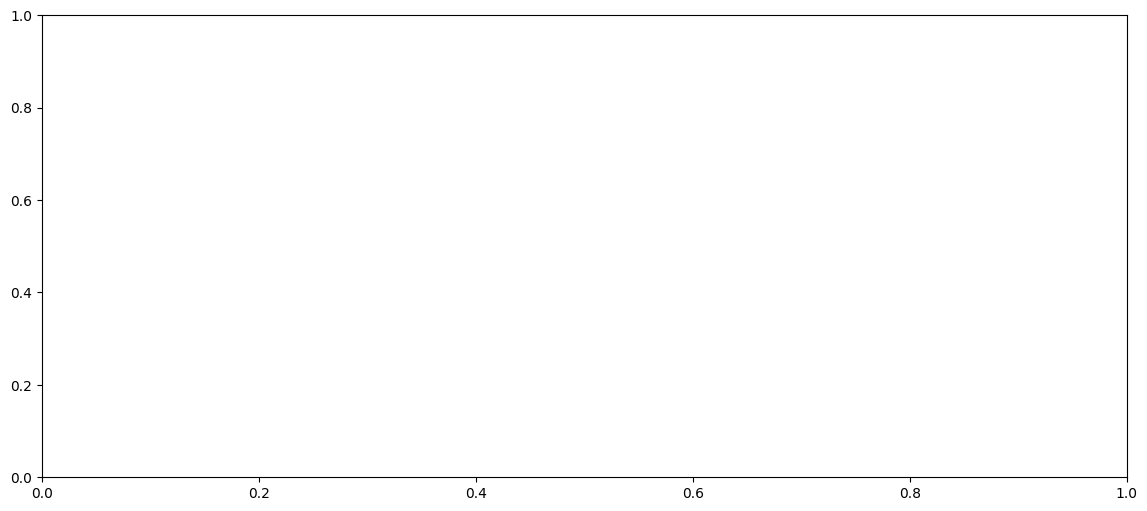

In [6]:
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df.index, df["SPY"], color="black", alpha=0.7, label="SPY Price")
ax1.set_ylabel("SPY Price", color="black")

# Regimes shading
regime_colors = {
    VolatilityRegime.LOW: "green",
    VolatilityRegime.MEDIUM: "orange",
    VolatilityRegime.HIGH: "red",
    VolatilityRegime.EXTREME: "purple"
}
for regime, color in regime_colors.items():
    mask = df["regime"] == regime
    ax1.fill_between(df.index, ax1.get_ylim()[0], ax1.get_ylim()[1],
                     where=mask, color=color, alpha=0.1, label=f"{regime.name} regime")

ax1.legend(loc="upper left")
plt.title("SPY Price with Volatility Regimes (based on VIX)")
plt.savefig(OUTPUT_DIR / "regime_price_overlay.png")
plt.show()

# ----------------------------
# 5. Regime-Conditioned Stats
# ----------------------------

In [7]:
summary_stats = (
    df.groupby("regime")["returns"]
    .agg(["mean", "std", "count"])
    .rename(columns={"mean": "avg_return", "std": "volatility"})
)
summary_stats["sharpe_proxy"] = summary_stats["avg_return"] / summary_stats["volatility"]

print("Regime-Conditioned Return Statistics:")
display(summary_stats)

# Save to CSV
summary_stats.to_csv(OUTPUT_DIR / "regime_stats.csv")

NameError: name 'df' is not defined

# -----------------------
# 6. Transition Analysis
# -----------------------


In [8]:
df["regime_shift"] = df["regime"] != df["regime"].shift(1)
transition_counts = df.loc[df["regime_shift"], "regime"].value_counts()

print("Regime Transition Counts:")
display(transition_counts)

# Plot transition points
plt.figure(figsize=(12,4))
plt.plot(df.index, df["VIX"], label="VIX", color="blue")
plt.scatter(df.loc[df["regime_shift"]].index,
            df.loc[df["regime_shift"], "VIX"],
            color="red", marker="o", s=60, label="Transitions")
plt.legend()
plt.title("VIX Levels at Regime Transition Points")
plt.savefig(OUTPUT_DIR / "regime_transitions.png")
plt.show()


NameError: name 'df' is not defined

# -----------------------
# 7. Save Outputs
# -----------------------

In [9]:
# Save features for downstream models
features_path = OUTPUT_DIR / "regime_features.parquet"
df[["SPY","VIX","regime"] + list(features.columns)].to_parquet(features_path)

print(f"EDA regime analysis complete. Outputs saved to {OUTPUT_DIR}")

NameError: name 'OUTPUT_DIR' is not defined